In [14]:
#imports necessary libraries
import pandas as pd
import numpy as np
import scipy as sp
from scipy.signal import firwin, lfilter, butter
import matplotlib.pyplot as plt
%matplotlib  inline

In [15]:
# Reads in base csv data, removes NaN, and sets appreiate datatypes
df = pd.read_csv (r'./\Tau_0.05_Seconds\Zachary Roberts Take 3.csv')

# Replaces all non-existent numbers with -1
df = df.fillna(-1)

# Ensures all data points are integers
df = df.astype(int)
df.head()

,Sample_1,Sample_2,Sample_3,Sample_4
0,1478,1545,1107,1251
1,1381,1741,1338,1260
2,1323,2063,1607,1330
3,1265,2344,1953,1309
4,1341,2638,2201,1311


In [16]:
# Removes any non existent numbers from the list
ECG_Sample = df.Sample_2.tolist()
ECG_Sample = [x for x in ECG_Sample if x != -1]
print(ECG_Sample)

[1545, 1741, 2063, 2344, 2638, 2558, 2375, 1820, 1406, 1081, 949, 1037, 1122, 1191, 1362, 1225, 1183, 1231, 1059, 1260, 1341, 1284, 1393, 1215, 1237, 1362, 1369, 1440, 1453, 1338, 1430, 1441, 1428, 1531, 1529, 1604, 1565, 1483, 1365, 1533, 1424, 1583, 1566, 1578, 1628, 1555, 1494, 1621, 1504, 1591, 1577, 1559, 1664, 1619, 1634, 1607, 1713, 1597, 1506, 1417, 1359, 1409, 1428, 1535, 1453, 1573, 1424, 1416, 1361, 1437, 1315, 1338, 1313, 1234, 1396, 1396, 1490, 1452, 1355, 1474, 1535, 1433, 1535, 1494, 1490, 1455, 1406, 1456, 1355, 1353, 1470, 1498, 1531, 1521, 1597, 1404, 1483, 1480, 1506, 1460, 1422, 1385, 1419, 1440, 1540, 1419, 1463, 1393, 1506, 1453, 1523, 1439, 1483, 1538, 1521, 1504, 1473, 1442, 1496, 1469, 1439, 1419, 1502, 1528, 1526, 1441, 1357, 1365, 1417, 1477, 1516, 1455, 1547, 1518, 1621, 1564, 1591, 1628, 1548, 1460, 1480, 1467, 1434, 1462, 1466, 1357, 1374, 1353, 1413, 1365, 1381, 1483, 1404, 1490, 1514, 1502, 1549, 1365, 1366, 1419, 1622, 1826, 2085, 2217, 2456, 2493, 2165

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.77, 5.54, 8.31, 11.08, 13.85, 16.62, 19.39, 22.16, 24.93, 27.7, 30.47, 33.24, 36.01, 38.78, 41.55, 44.32, 47.09, 49.86, 52.63, 55.4, 58.17, 60.94, 63.71, 66.48, 69.25, 72.02, 74.79, 77.56, 80.33, 83.1, 85.87, 88.64, 91.41, 94.18, 96.95, 99.72, 102.49, 105.26, 108.03, 110.8, 113.57000000000001, 116.34, 119.11, 121.88, 124.65, 127.42, 130.19, 132.96, 135.73, 138.5, 141.27, 144.04, 146.81, 149.58, 152.35, 155.12, 157.89000000000001, 160.66, 163.43, 166.2, 168.97, 171.74, 174.51, 177.28, 180.05, 182.82, 185.59, 188.36, 191.13, 193.9, 196.67, 199.44, 202.21, 204.98, 207.75, 210.52, 213.29, 216.06, 218.83, 221.6, 224.37, 227.14000000000001, 229.91, 232.68, 235.45, 238.22, 240.99, 243.76, 246.53, 249.3, 252.07, 254.84, 257.61, 260.38, 263.15, 265.92, 268.69, 271.46, 274.23, 277.0, 279.77, 282.54, 285.31, 288.08, 290.85, 293.62, 296.39, 299.16, 301.93, 304.7, 307.47, 310.24, 313.01, 315.78000000000003, 318.55, 321.32, 324.09, 326.86, 329.63, 332.4, 335.17, 337.94, 340.71, 343.48, 346.25, 34

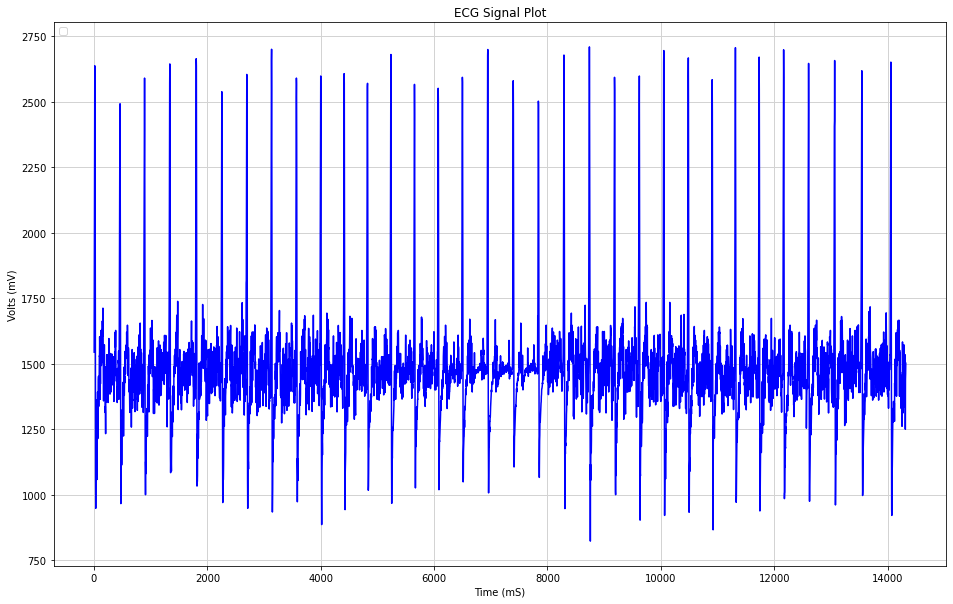

In [17]:
Time = range(1, (len(ECG_Sample)+1))
Time = [x * 2.77 for x in Time]
print(Time)

Sample = np.array(ECG_Sample)

plt.figure(figsize=(16,10))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(Time, Sample, color ="blue")

plt.legend(loc="upper left" )
plt.xlabel('Time (mS)')
plt.ylabel("Volts (mV)")
plt.title("ECG Signal Plot")
# To show the plot
plt.show()

In [18]:
#preps data for FFT
def highestPowerof2(n):
    res = 0;
    for i in range(n, 0, -1):
        # If i is a power of 2
        if ((i & (i - 1)) == 0):
            res = i
            break
    return res

maxSamples = highestPowerof2(len(ECG_Sample))

#truncates data to nearest power of 2
truncECG= ECG_Sample[1:maxSamples]

print(truncECG)

[1741, 2063, 2344, 2638, 2558, 2375, 1820, 1406, 1081, 949, 1037, 1122, 1191, 1362, 1225, 1183, 1231, 1059, 1260, 1341, 1284, 1393, 1215, 1237, 1362, 1369, 1440, 1453, 1338, 1430, 1441, 1428, 1531, 1529, 1604, 1565, 1483, 1365, 1533, 1424, 1583, 1566, 1578, 1628, 1555, 1494, 1621, 1504, 1591, 1577, 1559, 1664, 1619, 1634, 1607, 1713, 1597, 1506, 1417, 1359, 1409, 1428, 1535, 1453, 1573, 1424, 1416, 1361, 1437, 1315, 1338, 1313, 1234, 1396, 1396, 1490, 1452, 1355, 1474, 1535, 1433, 1535, 1494, 1490, 1455, 1406, 1456, 1355, 1353, 1470, 1498, 1531, 1521, 1597, 1404, 1483, 1480, 1506, 1460, 1422, 1385, 1419, 1440, 1540, 1419, 1463, 1393, 1506, 1453, 1523, 1439, 1483, 1538, 1521, 1504, 1473, 1442, 1496, 1469, 1439, 1419, 1502, 1528, 1526, 1441, 1357, 1365, 1417, 1477, 1516, 1455, 1547, 1518, 1621, 1564, 1591, 1628, 1548, 1460, 1480, 1467, 1434, 1462, 1466, 1357, 1374, 1353, 1413, 1365, 1381, 1483, 1404, 1490, 1514, 1502, 1549, 1365, 1366, 1419, 1622, 1826, 2085, 2217, 2456, 2493, 2165, 1725

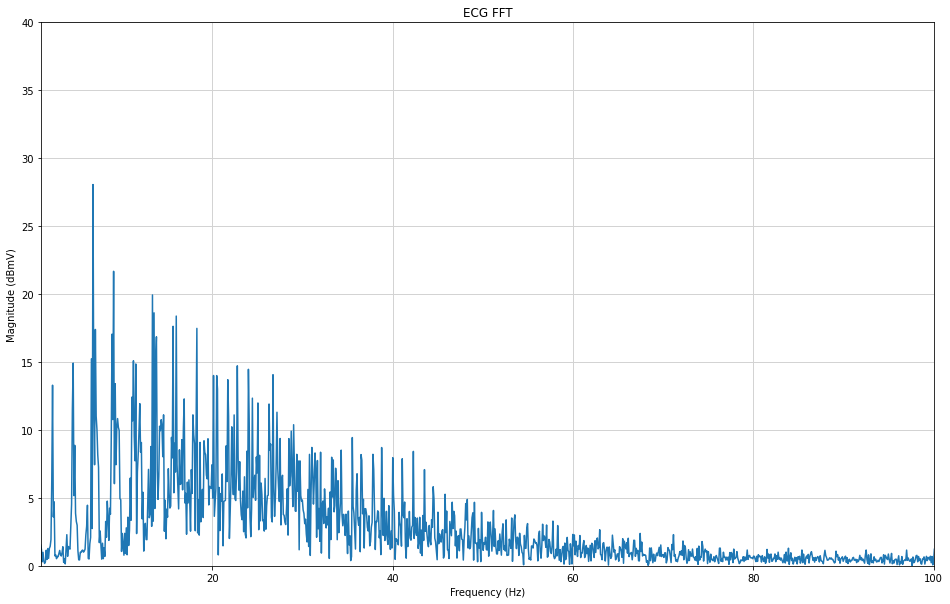

In [35]:
#Fast Fourier Transform of raw data - used to pinpoint highest freuqncy and compare relevency
#of freqnecy to the sampling data above to best determine optimal sampling frequency
sampleFreq = 360  # Sampling Frequency
tstep = 1 / sampleFreq  # time step interval

ECG_FFT = np.fft.fft(truncECG)
ECG_FFT_mag = np.abs(ECG_FFT) / maxSamples

fftFrequency = np.linspace(0, sampleFreq, maxSamples-1)

plt.figure(figsize=(16, 10))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.xlim(1, 100)
plt.ylim(0, 40)
plt.plot(fftFrequency, ECG_FFT_mag)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dBmV)')
plt.title('ECG FFT')

plt.show()

In [20]:
# Moving Average Filter
def moving_average_filter(signal, window_size):
    window = np.ones(window_size) / window_size
    filtered_signal = np.convolve(signal, window, mode='same')
    return filtered_signal

# Example usage
signal = np.array(ECG_Sample)
window_size = 15

filtered_signal = moving_average_filter(signal, window_size)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.77, 5.54, 8.31, 11.08, 13.85, 16.62, 19.39, 22.16, 24.93, 27.7, 30.47, 33.24, 36.01, 38.78, 41.55, 44.32, 47.09, 49.86, 52.63, 55.4, 58.17, 60.94, 63.71, 66.48, 69.25, 72.02, 74.79, 77.56, 80.33, 83.1, 85.87, 88.64, 91.41, 94.18, 96.95, 99.72, 102.49, 105.26, 108.03, 110.8, 113.57000000000001, 116.34, 119.11, 121.88, 124.65, 127.42, 130.19, 132.96, 135.73, 138.5, 141.27, 144.04, 146.81, 149.58, 152.35, 155.12, 157.89000000000001, 160.66, 163.43, 166.2, 168.97, 171.74, 174.51, 177.28, 180.05, 182.82, 185.59, 188.36, 191.13, 193.9, 196.67, 199.44, 202.21, 204.98, 207.75, 210.52, 213.29, 216.06, 218.83, 221.6, 224.37, 227.14000000000001, 229.91, 232.68, 235.45, 238.22, 240.99, 243.76, 246.53, 249.3, 252.07, 254.84, 257.61, 260.38, 263.15, 265.92, 268.69, 271.46, 274.23, 277.0, 279.77, 282.54, 285.31, 288.08, 290.85, 293.62, 296.39, 299.16, 301.93, 304.7, 307.47, 310.24, 313.01, 315.78000000000003, 318.55, 321.32, 324.09, 326.86, 329.63, 332.4, 335.17, 337.94, 340.71, 343.48, 346.25, 34

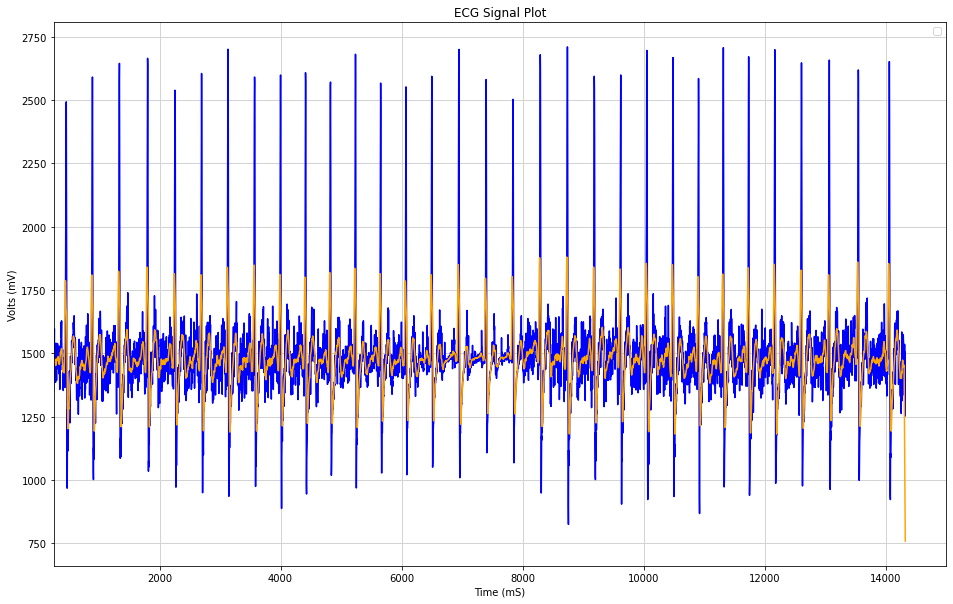

In [21]:
Time = range(1, (len(filtered_signal)+1))
Time = [x * 2.77 for x in Time]
print(Time)

moving_average = np.array(filtered_signal)

plt.figure(figsize=(16,10))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)


plt.plot(Time, ECG_Sample, color ="blue", label='Raw ECG')
plt.plot(Time, moving_average, color ="orange",  label='Moving Average')

plt.xlim(250, 15000)
plt.legend(loc="upper left" )
plt.xlabel('Time (mS)')
plt.ylabel("Volts (mV)")
plt.title("Moving Average VS Raw ECG Signal")
plt.legend()
plt.grid(True)
plt.show()

# To show the plot
plt.show()

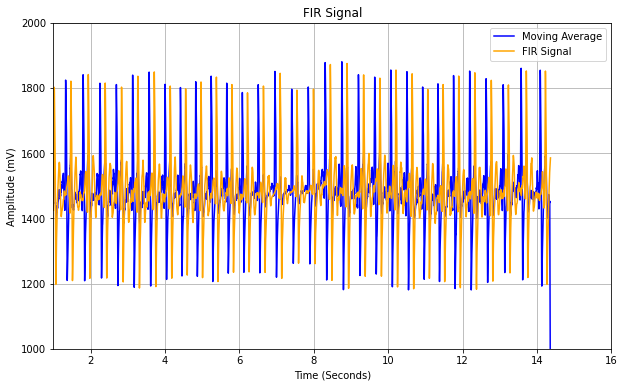

In [41]:
#Creates FIR Low Pass Filter
# Define filter specifications
cutoff_freq = 43  # Cutoff frequency in Hz
sampling_freq = 360  # Sampling frequency in Hz
filter_order = 101  # Filter order (number of taps)

# Compute filter coefficients
nyquist_freq = 0.5 * sampling_freq
normalized_cutoff_freq = cutoff_freq / nyquist_freq
filter_coefficients = sp.signal.firwin(filter_order, normalized_cutoff_freq)

# Generate a test signal
Time = range(1, (len(moving_average)+1))
Time = [x * .0027777777777777 for x in Time]

# Apply the FIR filter to the input signal
FIR_Signal = sp.signal.lfilter(filter_coefficients, 1, moving_average)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))

#plt.plot(Time, moving_average, label='Original Signal')
plt.plot(Time, moving_average, label='Moving Average', color='blue')
plt.plot(Time, FIR_Signal, label='FIR Signal', color ="orange")#color=[.1,.7,.2])

plt.title('FIR Signal')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude (mV)')
plt.ylim(1000, 2000)
plt.xlim(1, 16)
plt.legend()
plt.grid(True)
plt.show()


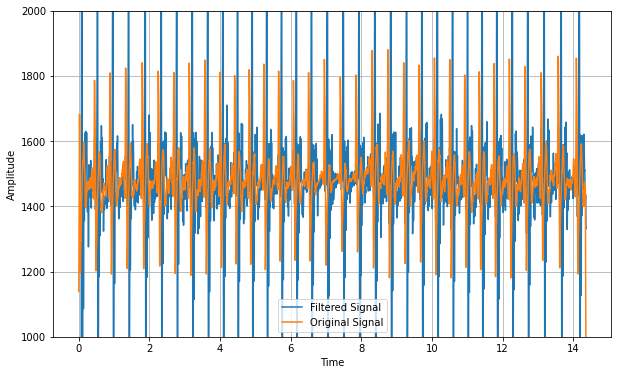

In [33]:
cutoff_freq = 43  # Cutoff frequency in Hz
sampling_freq = 360  # Sampling frequency in Hz
filter_order = 30  # Filter order (number of taps)

# Compute filter coefficients
nyquist_freq = 0.5 * sampling_freq
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(filter_order, normalized_cutoff_freq, btype='low', analog=False, output='ba')

# Generate a test signal
Time = range(1, (len(ECG_Sample)+1))
Time = [x * .0027777777777777 for x in Time]

# Apply the IIR filter to the input signal
filtered_signal = lfilter(b, a, ECG_Sample)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(Time, filtered_signal, label='Filtered Signal')
plt.plot(Time, moving_average, label='Original Signal')

plt.ylim(1000, 2000)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
#preps data for FFT
def highestPowerof2(n):
    res = 0;
    for i in range(n, 0, -1):
        # If i is a power of 2
        if ((i & (i - 1)) == 0):
            res = i
            break
    return res

maxSamples = highestPowerof2(len(moving_average))

#truncates data to nearest power of 2
truncmoving_average= moving_average[1:maxSamples]

print(truncmoving_average)

[1232.66666667 1304.73333333 1368.         ... 1267.         1217.
 1206.26666667]


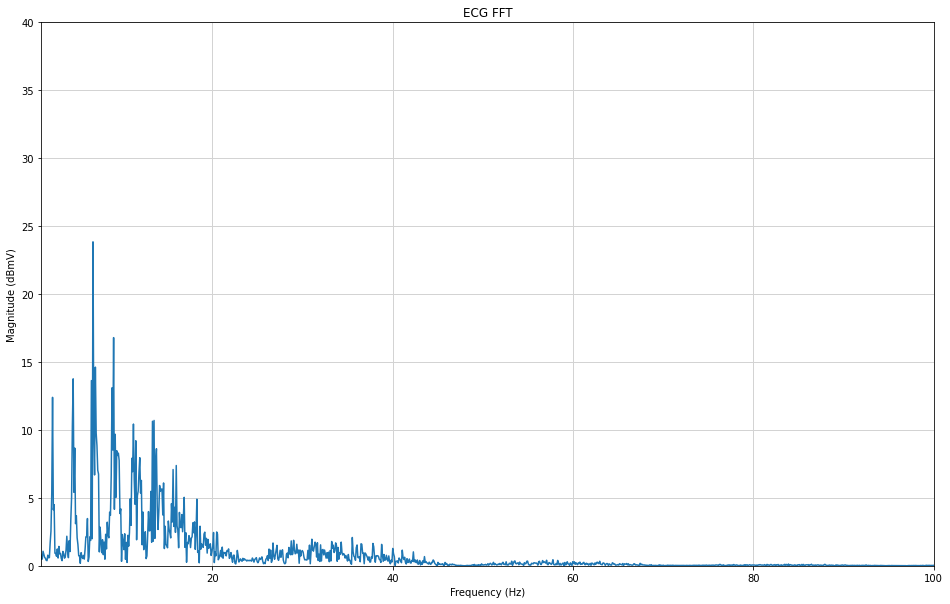

In [36]:
#Fast Fourier Transform of raw data - used to pinpoint highest freuqncy and compare relevency
#of freqnecy to the sampling data above to best determine optimal sampling frequency
sampleFreq = 360  # Sampling Frequency
tstep = 1 / sampleFreq  # time step interval

ECG_FFT = np.fft.fft(truncmoving_average)
ECG_FFT_mag = np.abs(ECG_FFT) / maxSamples

fftFrequency = np.linspace(0, sampleFreq, maxSamples-1)

plt.figure(figsize=(16, 10))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.xlim(1, 100)
plt.ylim(0, 40)
plt.plot(fftFrequency, ECG_FFT_mag)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dBmV)')
plt.title('ECG FFT')

plt.show()

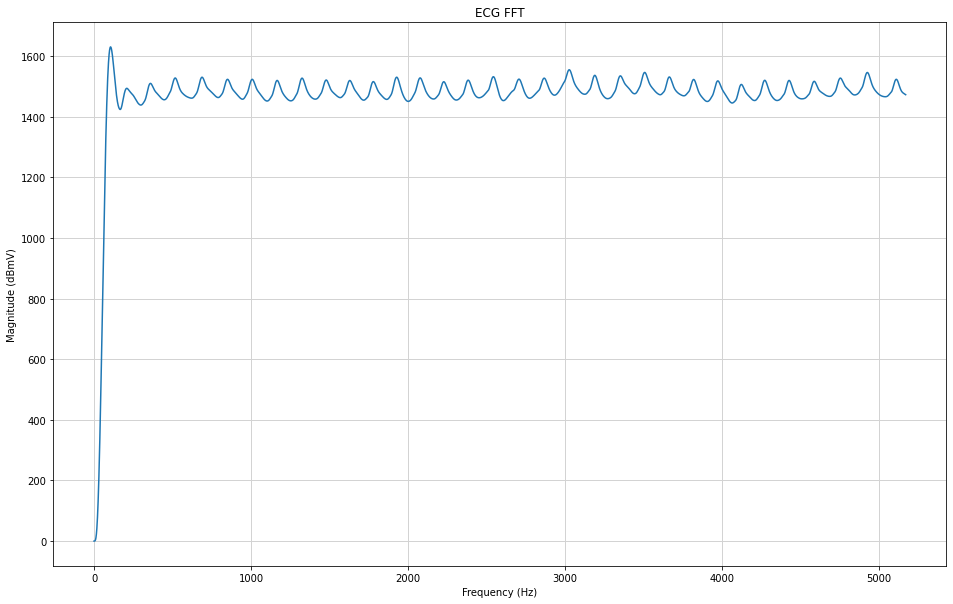

In [37]:

def apply_iir_filter(input_signal, cutoff_frequency, sampling_frequency, filter_order=4):
    nyquist_frequency = 0.5 * sampling_frequency
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(filter_order, normalized_cutoff, btype='low', analog=False)
    filtered_signal = lfilter(b, a, input_signal)
    return filtered_signal

# Example usage
cutoff_frequency = 3  # Cutoff frequency in Hz
sampling_frequency = 360  # Sampling frequency in Hz

filtered_signal = apply_iir_filter(ECG_Sample, cutoff_frequency, sampling_frequency)

plt.figure(figsize=(16, 10))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.plot(filtered_signal)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dBmV)')
plt.title('ECG FFT')

plt.show()
